In [1]:
HOME ='/home/'
PATH = HOME + 'jim'
import sys
sys.path.append(PATH)

import meteocpy as mpy
from meteocpy.forward import apex
from meteocpy.utils import load_params, BiDict

import numpy as np
import torch

import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
from importlib import reload
reload(apex)
reload(mpy.utils)

<module 'meteocpy.utils' from '/home/jim/meteocpy/utils.py'>

In [4]:
#ap = apex.load_apex(binned_vnir_swir='/Users/jim/meteoc/params/binned', binned_meta='/Users/jim/meteoc/params/meta', vnir_it=27000, swir_it=15000)
ap = apex.load_apex(unbinned_vnir=HOME + 'jim/meteoc/params/unbinned', binned_vnir_swir=HOME + 'jim/meteoc/params/binned', 
                    binned_meta=HOME + 'jim/meteoc/params/binned_meta', vnir_it=27000, swir_it=15000)

#ap.initialize_srfs([700, 800], abs_res=1, srf_support_in_sigma=3, zero_out=True, do_bin=True)
ap.initialize_srfs(exact_wvls=np.array([750]), srf_support_in_sigma=3, zero_out=True, do_bin=True)

[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]] (10000, 1) (10000,) (10000,) (array([   0,    1,    2, ..., 9997, 9998, 9999]), array([0, 0, 0, ..., 0, 0, 0]))


/home/jim/meteocpy/forward/apex.py:88: UserWarning: WARNING: you loaded unbinned calibration files but meta files are binned. Make sure tocall initialize_srfs with kwarg do_bin=True.
  warnings.warn('WARNING: you loaded unbinned calibration files but meta files are binned. Make sure to'


UnboundLocalError: local variable 'inds' referenced before assignment

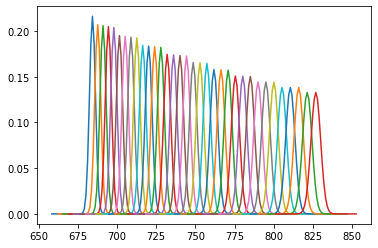

In [5]:
%matplotlib inline
_ = plt.plot(np.array(ap.model.binned.wvls[:, 500]).transpose(), 
             np.array(ap.model.binned.srfs[0, :, 500]).transpose())
#plt.figure()
#_ = plt.plot(np.array(ap.model.unbinned.wvls[:, 500]).transpose(), 
#             np.array(ap.model.unbinned.srfs[0, :, 500]).transpose())

In [7]:
res, illu_bands = ap.forward(inp_spectrum=np.array([1000000]).reshape(1, 1, -1), 
                             inp_wvlens=np.arange(800, 801, 1).reshape(1, 1), pad=False, part_covered=True, conv_mode='numba',
                             invert=True, snr=False, dc=False, smear=False, return_binned=True, run_specs=dict(joblib=False))

NUMBA!!!


In [8]:
res[0][0][:, 500]

array([ 2.56600971e-04, -8.38843883e-03,  5.47031962e+00,  7.56084959e+02,
        3.82474995e+03,  8.41164964e+02,  9.61454117e+00,  8.57139433e-04,
       -4.02197657e-03,  3.23615509e-03])

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_frame(ind, channel=0, vmax=None, vmin=None, figsize=None, binned='binned'):
    tostr = lambda f: "%.2f" % f
    wvls = list(map(tostr, ap.params[binned].cw[illu_bands[ind]].mean(axis=1)))
    
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    
    im = axs[0].matshow(res[ind][channel], aspect='auto', vmax=vmax, vmin=vmin)
    axs[0].yaxis.set_major_locator(ticker.MultipleLocator(1))
    axs[0].set_yticklabels([''] + wvls)
    
    divider = make_axes_locatable(axs[0])
    cax = divider.append_axes('right', size='1%', pad=0.05)
    plt.gcf().colorbar(im, cax=cax)
    
    axs[1].plot(wvls, res[ind][channel][:, [250, 500, 750]], '-o')
    axs[1].set_ylim([np.min(res[ind][channel][:, [250, 500, 750]]) * 0.9, np.max(res[ind][channel][:, [250, 500, 750]]) * 1.1])

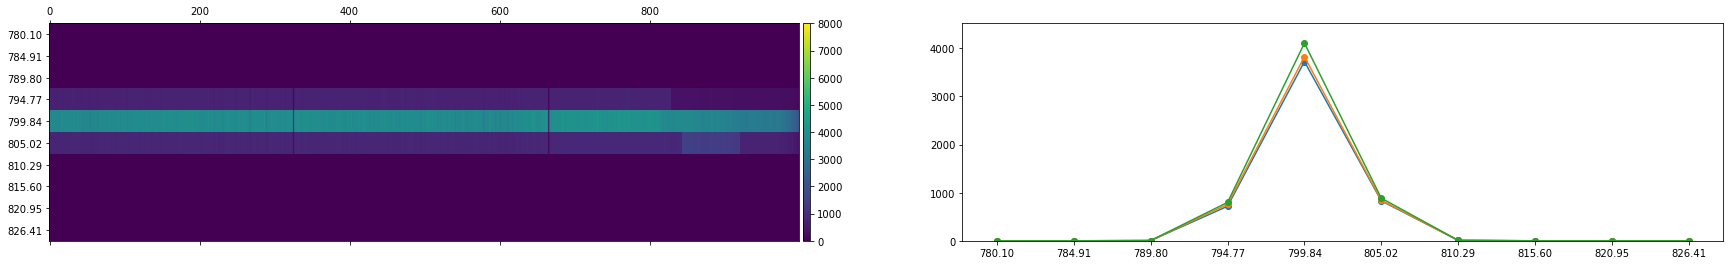

In [10]:
%matplotlib inline
inds = [0]
channel = 0
for ind in inds:
    plot_frame(ind, channel=channel, vmax=8000, vmin=None, figsize=(30, 4), binned='binned')

In [23]:
tostr = lambda f: "%.2f" % f
list(map(tostr, ap.params['binned'].cw[illu_bands[0]].mean(axis=1)))

['780.10',
 '784.91',
 '789.80',
 '794.77',
 '799.84',
 '805.02',
 '810.29',
 '815.60',
 '820.95',
 '826.41']

In [16]:
ap.bin_bands(ap.unbinn)

AttributeError: 'ApexSensorClass' object has no attribute 'unbinn'

In [42]:
ap.srfs[0, ap.shift_bands_to_local(ap.srf_bands)].shape

(68, 1000, 101)

In [43]:
ap.binning_pattern[ap.srf_bands]

array([ 2,  1, 23, 24, 27, 22, 19, 15, 13, 11,  9,  9,  8,  8,  7,  6,  5,
        5,  4,  4,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

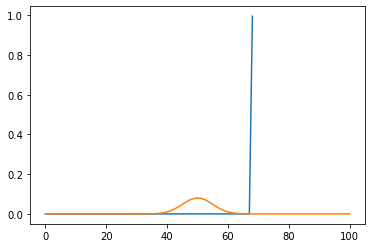

In [49]:
plt.plot(a[0, 14, 500, :])
plt.plot(ap.srfs[0, 7, 500, :])                               

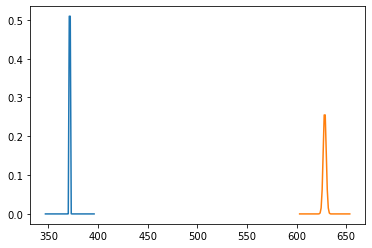

In [266]:
plt.plot(ap.wvls[1, 500, :], ap.srfs[0, 1, 500, :] / np.sum(ap.srfs[0, 1, 500, :]) / (ap.wvls[1, 500, -1] - ap.wvls[1, 500, 0]) * ap.srfs.shape[-1])
plt.plot(ap.wvls[39, 500, :], ap.srfs[0, 39, 500, :] / np.sum(ap.srfs[0, 39, 500, :]) / (ap.wvls[39, 500, -1] - ap.wvls[39, 500, 0]) * ap.srfs.shape[-1])
                                                              

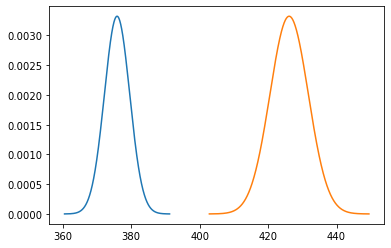

In [277]:
plt.plot(ap.wvls[2, 500, :], ap.srfs[0, 2, 500, :]/ np.sum(ap.srfs[0, 2, 500, :]))
plt.plot(ap.wvls[6, 500, :], ap.srfs[0, 6, 500, :] / np.sum(ap.srfs[0, 6, 500, :]))
                                                              

In [51]:
sum(ap.binning_pattern)

338

In [62]:
ap.rad_coeffs['gain'].shape

(316, 1000)